In [ ]:
%cd ~/REVIVAL2
%load_ext autoreload
%autoreload 2
# %load_ext blackcellmagic

/disk2/fli/REVIVAL2


In [2]:
import sys
import os
import numpy
import openmm
print(f"Python: {sys.version}")
print(f"NumPy: {numpy.__version__}")
print(f"OpenMM: {openmm.version.version}")
print(f"Environment: {os.environ}")

Python: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) 
[GCC 9.4.0]
NumPy: 2.0.2
OpenMM: 7.7.0.dev-130124a
Environment: environ({'USER': 'fli', 'SSH_CLIENT': '131.215.249.59 49529 22', 'XDG_SESSION_TYPE': 'tty', 'SHLVL': '2', 'MOTD_SHOWN': 'pam', 'HOME': '/disk2/fli', 'OLDPWD': '/disk2/fli/.vscode-server', 'SSL_CERT_FILE': '/usr/lib/ssl/certs/ca-certificates.crt', 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1002/bus', 'LOGNAME': 'fli', '_': '/disk2/fli/miniconda3/envs/vina/bin/python', 'XDG_SESSION_CLASS': 'user', 'XDG_SESSION_ID': '11349', 'VSCODE_CLI_REQUIRE_TOKEN': 'bba36035-143a-4a7f-bb2b-7cd617aa4f8f', 'PATH': '/disk2/fli/miniconda3/envs/vina/bin:/disk2/fli/.vscode-server/cli/servers/Stable-91fbdddc47bc9c09064bf7acf133d22631cbf083/server/bin/remote-cli:/disk2/fli/.local/bin:/disk2/fli/openmpi/bin:/disk2/fli/orca_6_0_1:/disk2/fli/miniconda3/envs/vina/bin:/disk2/fli/miniconda3/condabin:/disk2/fli/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/

In [7]:
from REVIVAL.global_param import LIB_INFO_DICT

In [253]:
from REVIVAL.zs.vina import dock

dock(
    input_struct_path="/disk2/fli/REVIVAL2/zs/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V/I165A:I183A:Y301V_0.cif",
    dock_opt="substrate",
    score_only = True,
    regen=True,
    rerun=True
)

Converting CIF to PDB: /disk2/fli/REVIVAL2/zs/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V/I165A:I183A:Y301V_0.cif -> /disk2/fli/REVIVAL2/zs/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V/I165A:I183A:Y301V_0.pdb
Detected residues to replace: set()


1 molecule converted


Formatting ligand 4bromo
Checking for ions...
Processing ligand 4bromo from zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/I165A:I183A:Y301V_0.pdb
insdie extract_substruct
/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_temp.pdb
Substrate atoms: [(<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C1>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C2>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C3>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C4>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C5>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C6>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom N1>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C7>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode

1 molecule converted


Vina run (score-only) completed successfully. Log saved to: zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/I165A:I183A:Y301V_0-4bromosubstrate-score_only_log.txt


'zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/I165A:I183A:Y301V_0-4bromosubstrate-score_only_log.txt'

In [82]:
from REVIVAL.zs.vina import protonate_smiles

In [83]:
from rdkit import Chem

In [171]:
# from rdkit import Chem
# from rdkit.Chem import AllChem
# import numpy as np

# def align_and_fix_molecule(smiles: str, original_pdb: str, generated_pdb: str, output_pdb: str):
#     """
#     Align and fix a molecule based on SMILES and PDB structures.

#     Args:
#         smiles (str): SMILES string of the molecule.
#         original_pdb (str): Path to the original PDB file.
#         generated_pdb (str): Path to the generated PDB file with hydrogens.
#         output_pdb (str): Path to save the aligned and fixed PDB file.
#     """
#     # Step 1: Load the original PDB molecule
#     mol_original = Chem.MolFromPDBFile(original_pdb, removeHs=False)
#     if not mol_original:
#         raise ValueError("Could not parse the original PDB file.")

#     # Step 2: Load the generated PDB molecule with hydrogens
#     mol_generated = Chem.MolFromPDBFile(generated_pdb, removeHs=False)
#     if not mol_generated:
#         raise ValueError("Could not parse the generated PDB file.")

#     # Step 3: Create a molecule from SMILES with correct connectivity and bond orders
#     mol_smiles = Chem.MolFromSmiles(smiles)
#     if not mol_smiles:
#         raise ValueError("Invalid SMILES string.")
#     mol_smiles_with_h = Chem.AddHs(mol_smiles)

#     # Assign bond orders from SMILES to the generated molecule
#     mol_updated = AllChem.AssignBondOrdersFromTemplate(mol_smiles_with_h, mol_generated)

#     # Step 4: Align the conformers
#     conf_original = mol_original.GetConformer()
#     conf_generated = mol_updated.GetConformer()

#     # Collect heavy atom indices
#     heavy_atom_indices = [
#         i for i, atom in enumerate(mol_updated.GetAtoms()) if atom.GetSymbol() != "H"
#     ]

#     # Perform alignment based on heavy atoms
#     AllChem.AlignMol(mol_updated, mol_original, prbCid=0, refCid=0, atomMap=[(i, i) for i in heavy_atom_indices])

#     # Step 5: Transfer hydrogens from generated PDB
#     for atom_idx, atom in enumerate(mol_generated.GetAtoms()):
#         if atom.GetSymbol() == "H":
#             pos_gen = mol_generated.GetConformer().GetAtomPosition(atom_idx)
#             conf_generated.SetAtomPosition(atom_idx, pos_gen)

#     # Step 6: Save the aligned and updated molecule to PDB
#     with open(output_pdb, "w") as f:
#         f.write(Chem.MolToPDBBlock(mol_updated))

#     print(f"Aligned and fixed molecule saved to {output_pdb}")

# from rdkit import Chem
# from rdkit.Chem import AllChem
# import numpy as np


# def align_and_fix_molecule(smiles: str, original_pdb: str, generated_pdb: str, output_pdb: str):
#     """
#     Align and fix a molecule based on SMILES and PDB structures.

#     Args:
#         smiles (str): SMILES string of the molecule.
#         original_pdb (str): Path to the original PDB file.
#         generated_pdb (str): Path to the generated PDB file with hydrogens.
#         output_pdb (str): Path to save the aligned and fixed PDB file.
#     """
#     # Step 1: Load the original PDB molecule
#     mol_original = Chem.MolFromPDBFile(original_pdb, removeHs=False)
#     if not mol_original:
#         raise ValueError("Could not parse the original PDB file.")

#     # Step 2: Load the generated PDB molecule
#     mol_generated = Chem.MolFromPDBFile(generated_pdb, removeHs=False)
#     if not mol_generated:
#         raise ValueError("Could not parse the generated PDB file.")

#     # Step 3: Create a molecule from SMILES with hydrogens
#     mol_smiles = Chem.MolFromSmiles(smiles)
#     if not mol_smiles:
#         raise ValueError("Invalid SMILES string.")
#     mol_smiles_with_h = Chem.AddHs(mol_smiles)

#     # Assign bond orders from the SMILES to the generated PDB
#     mol_updated = AllChem.AssignBondOrdersFromTemplate(mol_smiles_with_h, mol_generated)

#     # Step 4: Align heavy atoms of `mol_updated` to `mol_original`
#     original_atoms = [
#         (atom.GetSymbol(), i, mol_original.GetConformer().GetAtomPosition(i))
#         for i, atom in enumerate(mol_original.GetAtoms()) if atom.GetSymbol() != "H"
#     ]
#     updated_atoms = [
#         (atom.GetSymbol(), i, mol_updated.GetConformer().GetAtomPosition(i))
#         for i, atom in enumerate(mol_updated.GetAtoms()) if atom.GetSymbol() != "H"
#     ]

#     # Match heavy atoms by element type
#     atom_map = []
#     for (symbol_orig, index_orig, _), (symbol_upd, index_upd, _) in zip(original_atoms, updated_atoms):
#         if symbol_orig == symbol_upd:
#             atom_map.append((index_upd, index_orig))

#     # Align based on heavy atom positions
#     AllChem.AlignMol(mol_updated, mol_original, atomMap=atom_map)

#     # Step 5: Update hydrogen positions from `generated_pdb`
#     for atom in mol_generated.GetAtoms():
#         if atom.GetSymbol() == "H":
#             idx = atom.GetIdx()
#             position = mol_generated.GetConformer().GetAtomPosition(idx)
#             mol_updated.GetConformer().SetAtomPosition(idx, position)

#     # Step 6: Save the aligned and fixed molecule to the output PDB
#     with open(output_pdb, "w") as f:
#         f.write(Chem.MolToPDBBlock(mol_updated))

#     print(f"Aligned and fixed molecule saved to {output_pdb}")
# from rdkit import Chem
# from rdkit.Chem import AllChem, rdMolAlign
# import numpy as np

# def align_and_fix_molecule(smiles: str, original_pdb: str, generated_pdb: str, output_pdb: str):
#     """
#     Align and fix a molecule based on SMILES and PDB structures.

#     Args:
#         smiles (str): SMILES string of the molecule.
#         original_pdb (str): Path to the original PDB file.
#         generated_pdb (str): Path to the generated PDB file with hydrogens.
#         output_pdb (str): Path to save the aligned and fixed PDB file.
#     """
#     # Step 1: Load the original PDB molecule
#     mol_original = Chem.MolFromPDBFile(original_pdb, removeHs=False)
#     if not mol_original:
#         raise ValueError("Could not parse the original PDB file.")

#     # Step 2: Load the generated PDB molecule with hydrogens
#     mol_generated = Chem.MolFromPDBFile(generated_pdb, removeHs=False)
#     if not mol_generated:
#         raise ValueError("Could not parse the generated PDB file.")

#     # Step 3: Create a molecule from SMILES with correct connectivity and bond orders
#     mol_smiles = Chem.MolFromSmiles(smiles)
#     if not mol_smiles:
#         raise ValueError("Invalid SMILES string.")

#     mol_with_h = Chem.AddHs(mol_smiles)

#     # Handle explicit protonation for atoms like O or P
#     for atom in mol_with_h.GetAtoms():
#         if atom.GetSymbol() in ["O"] and atom.GetFormalCharge() == -1:
#             atom.SetFormalCharge(0)
#             atom.SetNumExplicitHs(atom.GetNumExplicitHs() + 1)

#     AllChem.EmbedMolecule(mol_with_h, useRandomCoords=False)
#     AllChem.UFFOptimizeMolecule(mol_with_h)

#     # Step 4: Map atoms between SMILES molecule and original PDB
#     match = mol_original.GetSubstructMatch(mol_with_h)
#     if not match:
#         raise RuntimeError("No sub-structure match found between the probe and query molecules.")

#     # Step 5: Align the molecules using the matched atom indices
#     rmsd = rdMolAlign.AlignMol(mol_with_h, mol_original, atomMap=list(enumerate(match)))
#     print(f"RMSD of alignment: {rmsd}")

#     # Step 6: Save the aligned molecule as a PDB file
#     with open(output_pdb, "w") as f:
#         f.write(Chem.MolToPDBBlock(mol_with_h))

#     print(f"Aligned and fixed molecule saved to {output_pdb}")


def align_and_fix_molecule(smiles: str, original_pdb: str, generated_pdb: str, output_pdb: str):
    """
    Align and fix a molecule based on SMILES and PDB structures.

    Args:
        smiles (str): SMILES string of the molecule.
        original_pdb (str): Path to the original PDB file.
        generated_pdb (str): Path to the generated PDB file with hydrogens.
        output_pdb (str): Path to save the aligned and fixed PDB file.
    """
    # Step 1: Load the original PDB molecule
    mol_original = Chem.MolFromPDBFile(original_pdb, removeHs=False)
    if not mol_original:
        raise ValueError("Could not parse the original PDB file.")
    conf_original = mol_original.GetConformer()

    # Step 2: Load the generated PDB molecule with hydrogens
    mol_generated = Chem.MolFromPDBFile(generated_pdb, removeHs=False)
    if not mol_generated:
        raise ValueError("Could not parse the generated PDB file.")
    conf_generated = mol_generated.GetConformer()

    # Step 3: Create a molecule from SMILES with correct connectivity and bond orders
    mol_smiles = Chem.MolFromSmiles(smiles)
    if not mol_smiles:
        raise ValueError("Invalid SMILES string.")

    mol_with_h = Chem.AddHs(mol_smiles)

    # Handle explicit protonation for atoms like O or P
    for atom in mol_with_h.GetAtoms():
        if atom.GetSymbol() in ["O"] and atom.GetFormalCharge() == -1:
            atom.SetFormalCharge(0)
            atom.SetNumExplicitHs(atom.GetNumExplicitHs() + 1)

    AllChem.EmbedMolecule(mol_with_h, useRandomCoords=False)
    AllChem.UFFOptimizeMolecule(mol_with_h)
    conf_smiles = mol_with_h.GetConformer()

    # Step 4: Align the heavy atoms of the generated molecule to the original PDB
    original_atoms = [
        (atom.GetSymbol(), i, conf_original.GetAtomPosition(i))
        for i, atom in enumerate(mol_original.GetAtoms()) if atom.GetSymbol() != "H"
    ]
    smiles_atoms = [
        (atom.GetSymbol(), i, conf_smiles.GetAtomPosition(i))
        for i, atom in enumerate(mol_with_h.GetAtoms()) if atom.GetSymbol() != "H"
    ]
    print(original_atoms)
    print(smiles_atoms)

    # Match atoms based on element type
    matched_coords_original = []
    matched_coords_smiles = []
    for (symbol_orig, index_orig, coord_orig), (symbol_smiles, index_smiles, coord_smiles) in zip(original_atoms, smiles_atoms):
        if symbol_orig == symbol_smiles:
            matched_coords_original.append(coord_orig)
            matched_coords_smiles.append(coord_smiles)

    if not matched_coords_original or not matched_coords_smiles:
        raise ValueError("Failed to find matching heavy atoms for alignment.")

    # Step 5: Compute alignment transformation (RMSD alignment)
    matched_coords_original = np.array(matched_coords_original)
    matched_coords_smiles = np.array(matched_coords_smiles)

    centroid_original = np.mean(matched_coords_original, axis=0)
    centroid_smiles = np.mean(matched_coords_smiles, axis=0)

    centered_original = matched_coords_original - centroid_original
    centered_smiles = matched_coords_smiles - centroid_smiles

    H = np.dot(centered_smiles.T, centered_original)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(U, Vt)

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(U, Vt)

    # Step 6: Apply transformation to all atoms in the SMILES molecule
    coords_smiles = np.array([conf_smiles.GetAtomPosition(i) for i in range(mol_with_h.GetNumAtoms())])
    transformed_coords = np.dot(coords_smiles - centroid_smiles, R) + centroid_original

    # Update coordinates in the SMILES molecule
    for i, coord in enumerate(transformed_coords):
        conf_smiles.SetAtomPosition(i, coord)

    # Step 7: Save the transformed molecule as a PDB file
    with open(output_pdb, "w") as f:
        f.write(Chem.MolToPDBBlock(mol_with_h))

    print(f"Aligned and fixed molecule saved to {output_pdb}")


In [132]:
from REVIVAL.zs.vina import protonate_smiles, protonate_oxygen

In [151]:
mol = Chem.MolFromSmiles("C1=CC2=C(C=CN2)C(=C1)Br")
protonated_smiles = protonate_oxygen(protonate_smiles(smiles=Chem.MolToSmiles(mol, isomericSmiles=True), pH=7.4))

In [172]:
align_and_fix_molecule(
    smiles=protonated_smiles,
    original_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb",
    generated_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prealigned.pdb",
    output_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb")

RuntimeError: No sub-structure match found between the probe and query molecules.

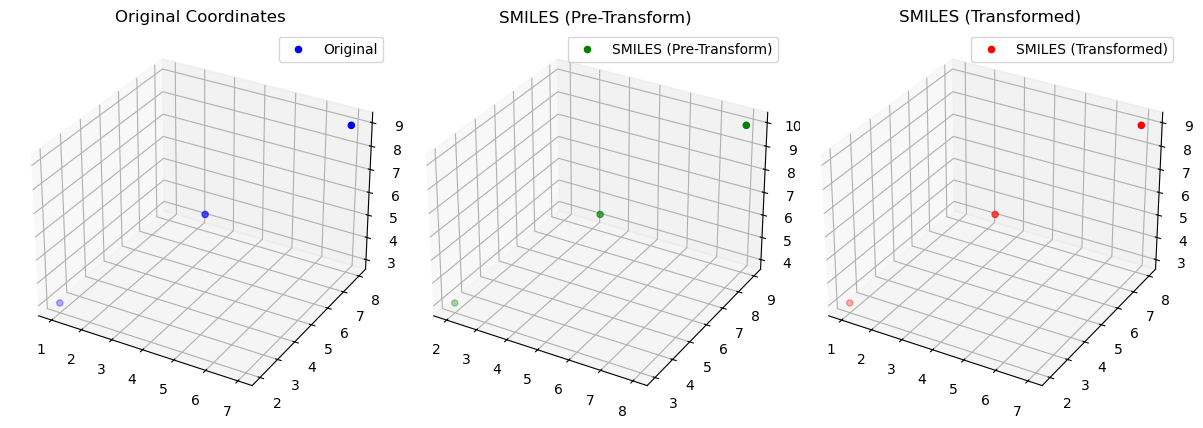

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for matched coordinates
matched_coords_original = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matched_coords_smiles = np.array([[2, 3, 4], [5, 6, 7], [8, 9, 10]])

# Compute centroids
centroid_original = np.mean(matched_coords_original, axis=0)
centroid_smiles = np.mean(matched_coords_smiles, axis=0)

# Centered coordinates
centered_original = matched_coords_original - centroid_original
centered_smiles = matched_coords_smiles - centroid_smiles

# Compute alignment
H = np.dot(centered_smiles.T, centered_original)
U, S, Vt = np.linalg.svd(H)
R = np.dot(U, Vt)

if np.linalg.det(R) < 0:
    Vt[-1, :] *= -1
    R = np.dot(U, Vt)

# Transform smiles coordinates
coords_smiles = matched_coords_smiles
transformed_coords = np.dot(coords_smiles - centroid_smiles, R) + centroid_original

# Plot the transformations
fig = plt.figure(figsize=(12, 6))

# Original coordinates
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(*matched_coords_original.T, color='blue', label='Original')
ax1.set_title('Original Coordinates')
ax1.legend()

# SMILES coordinates before transformation
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(*matched_coords_smiles.T, color='green', label='SMILES (Pre-Transform)')
ax2.set_title('SMILES (Pre-Transform)')
ax2.legend()

# Transformed coordinates
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(*transformed_coords.T, color='red', label='SMILES (Transformed)')
ax3.set_title('SMILES (Transformed)')
ax3.legend()

plt.tight_layout()
plt.show()


In [212]:
from Bio.PDB import PDBParser, Superimposer, PDBIO

from Bio.PDB import PDBParser, PDBIO, Vector, rotmat

# File paths
prehydrogen_pdb_path = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb"
prealigned_pdb_path = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prealigned.pdb"
output_pdb_path = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb"

# Parse structures
# Parse structures
parser = PDBParser(QUIET=True)
structure_prehydrogen = parser.get_structure("prehydrogen", prehydrogen_pdb_path)
structure_prealigned = parser.get_structure("prealigned", prealigned_pdb_path)

# Extract heavy atoms (non-H)
prehydrogen_atoms = [atom for atom in structure_prehydrogen.get_atoms() if atom.element != "H"]
prealigned_atoms = [atom for atom in structure_prealigned.get_atoms() if atom.element != "H"]

# Ensure the atom counts match
if len(prehydrogen_atoms) != len(prealigned_atoms):
    raise ValueError("Mismatch in heavy atom counts between the prehydrogen and prealigned structures.")

# Compute centroids (convert all .coord attributes to numpy arrays)
centroid_prehydrogen = np.mean([np.array(atom.coord) for atom in prehydrogen_atoms], axis=0)
centroid_prealigned = np.mean([np.array(atom.coord) for atom in prealigned_atoms], axis=0)

# Calculate rotation matrix
rotation_matrix = rotmat(Vector(centroid_prehydrogen), Vector(centroid_prealigned))

# Apply the transformation to all atoms in prealigned
for model in structure_prealigned:
    for chain in model:
        for residue in chain:
            for atom in residue:
                # Transform each atom's coordinates
                atom_coord = np.array(atom.coord)  # Convert to numpy array
                transformed_vector = np.dot(rotation_matrix, atom_coord - centroid_prealigned) + centroid_prehydrogen
                atom.set_coord(transformed_vector)

# Transfer hydrogens from transformed prealigned to prehydrogen
for prehydrogen_res, prealigned_res in zip(structure_prehydrogen.get_residues(), structure_prealigned.get_residues()):
    # Map heavy atoms by name
    prehydrogen_atoms_map = {atom.name: atom for atom in prehydrogen_res.get_atoms() if atom.element != "H"}
    for atom in prealigned_res.get_atoms():
        if atom.element == "H":  # Only transfer hydrogens
            # Match hydrogen to its parent heavy atom by proximity
            parent_heavy_atom = None
            min_distance = float("inf")
            for heavy_atom in prealigned_res.get_atoms():
                if heavy_atom.element != "H":
                    distance = np.linalg.norm(np.array(atom.coord) - np.array(heavy_atom.coord))
                    if distance < min_distance:
                        min_distance = distance
                        parent_heavy_atom = heavy_atom

            if parent_heavy_atom and parent_heavy_atom.name in prehydrogen_atoms_map:
                # Add hydrogen relative to the parent heavy atom in prehydrogen
                parent_atom_prehydrogen = prehydrogen_atoms_map[parent_heavy_atom.name]
                hydrogen_relative_position = np.array(atom.coord) - np.array(parent_heavy_atom.coord)
                hydrogen_final_position = np.array(parent_atom_prehydrogen.coord) + hydrogen_relative_position

                # Create the new hydrogen atom
                new_hydrogen = atom.copy()
                new_hydrogen.set_coord(hydrogen_final_position)
                prehydrogen_res.add(new_hydrogen)

# Save the updated structure
io = PDBIO()
io.set_structure(structure_prehydrogen)
io.save(output_pdb_path)


In [219]:
import numpy as np
import itertools

def parse_pdb_coordinates(filename):
    """
    Returns
      heavy_dict: { atom_name: np.array([x,y,z]) }
      hydrogens: list of (original_line, np.array([x,y,z]))
    """
    heavy_dict = {}
    hydrogens = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith(('ATOM', 'HETATM')):
                name = line[12:16].strip()
                element = line[76:78].strip().upper()
                x = float(line[30:38])
                y = float(line[38:46])
                z = float(line[46:54])
                coord = np.array([x, y, z], dtype=float)

                if element == 'H':
                    hydrogens.append((line, coord))
                else:
                    heavy_dict[name] = coord
    return heavy_dict, hydrogens


def kabsch_alignment(A_coords, B_coords):
    """Return R, t for best-fit B->A using Kabsch."""
    centroid_A = np.mean(A_coords, axis=0)
    centroid_B = np.mean(B_coords, axis=0)
    A_centered = A_coords - centroid_A
    B_centered = B_coords - centroid_B

    H = np.dot(B_centered.T, A_centered)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    if np.linalg.det(R) < 0:
        # Fix right-handed system
        Vt[-1,:] *= -1
        R = np.dot(Vt.T, U.T)

    t = centroid_A - np.dot(R, centroid_B)
    return R, t


def rmsd(A_coords, B_coords):
    """Compute RMSD between two sets of points of same shape."""
    diff = A_coords - B_coords
    return np.sqrt((diff * diff).sum(axis=1).mean())


def superimpose_with_permutation_search(pdb_a, pdb_b, out_pdb):
    """
    1. Read heavy atoms & H from A, B
    2. Try all permutations of B's heavy-atom names to find best RMSD
    3. Apply the best R,t to B's H
    4. Write out A's heavy coords + transformed B's H
    """
    heavyA, _ = parse_pdb_coordinates(pdb_a)
    heavyB, hyB = parse_pdb_coordinates(pdb_b)

    namesA = list(heavyA.keys())
    namesB = list(heavyB.keys())
    nA = len(namesA)
    nB = len(namesB)

    if nA != nB:
        raise ValueError("Number of heavy atoms in A and B differ. Cannot align one-to-one.")

    # Convert A's coords to array in the order they appear in namesA
    coordsA = np.array([heavyA[n] for n in namesA], dtype=float)

    best_rmsd = 1e9
    best_perm = None
    best_R = None
    best_t = None

    # Try all permutations of B's heavy-atom names
    for perm in itertools.permutations(namesB):
        # coordsB in this permutation
        coordsB = np.array([heavyB[n] for n in perm], dtype=float)

        # Run Kabsch
        R, t = kabsch_alignment(coordsA, coordsB)
        # Transform coordsB
        B_aligned = np.dot(R, coordsB.T).T + t  # shape Nx3

        # Compute RMSD
        cur_rmsd = rmsd(coordsA, B_aligned)
        if cur_rmsd < best_rmsd:
            best_rmsd = cur_rmsd
            best_perm = perm
            best_R = R
            best_t = t

    print("Best RMSD found:", best_rmsd)
    print("Best permutation:", best_perm)

    # Having found the best permutation & transform:
    # We'll apply it to the hydrogens
    transformed_hy = []
    for (h_line, hcoord) in hyB:
        # rotate + translate
        h_new = np.dot(best_R, hcoord) + best_t
        transformed_hy.append((h_line, h_new))

    # Write final result: A's heavy + transformed H from B
    with open(pdb_a, 'r') as fA, open(out_pdb, 'w') as fout:
        # Write heavy from A
        for line in fA:
            if line.startswith(('ATOM', 'HETATM')):
                element = line[76:78].strip().upper()
                if element != 'H':
                    fout.write(line)
            else:
                fout.write(line)

        # Append H lines from B, using new coords
        for (orig_line, new_coord) in transformed_hy:
            prefix = orig_line[:30]
            suffix = orig_line[54:]
            x, y, z = new_coord
            coords_str = f"{x:8.3f}{y:8.3f}{z:8.3f}"
            fout.write(prefix + coords_str + suffix)

    print(f"Final superimposed structure with best-match alignment saved to: {out_pdb}")


In [222]:
superimpose_with_permutation_search(
    pdb_a = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb",
    pdb_b = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prealigned.pdb",
    out_pdb = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb"
)

Best RMSD found: 0.07528145452013768
Best permutation: ('C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'N1', 'C8', 'C1', 'BR1')
Final superimposed structure with best-match alignment saved to: /disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb


In [224]:
import numpy as np
import itertools

def parse_pdb(filename):
    """
    Read ATOM/HETATM lines, separate heavy atoms vs. hydrogens.
    Returns:
      heavy_dict: {atom_name: (x, y, z, original_line)}
      hydrogens:  [(original_line, (x, y, z))]
    """
    heavy_dict = {}
    hydrogens = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith(('ATOM', 'HETATM')):
                name = line[12:16].strip()
                elem = line[76:78].strip().upper()  # e.g. 'C', 'N', 'O', 'H', ...
                x = float(line[30:38])
                y = float(line[38:46])
                z = float(line[46:54])
                
                if elem == 'H':
                    hydrogens.append((line, (x, y, z)))
                else:
                    heavy_dict[name] = (x, y, z, line)
    return heavy_dict, hydrogens

def kabsch_alignment(A_coords, B_coords):
    """
    Given Nx3 arrays A_coords and B_coords,
    returns R, t that maps B->A via X_new = R * B + t
    """
    A_coords = np.array(A_coords)
    B_coords = np.array(B_coords)
    centroid_A = A_coords.mean(axis=0)
    centroid_B = B_coords.mean(axis=0)

    A_c = A_coords - centroid_A
    B_c = B_coords - centroid_B

    H = B_c.T @ A_c
    U, S, Vt = np.linalg.svd(H)
    R = (Vt.T @ U.T)

    # Ensure a right-handed coordinate system
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = (Vt.T @ U.T)

    t = centroid_A - R @ centroid_B
    return R, t


def rmsd(coordsA, coordsB):
    """
    Simple RMSD between Nx3 coords
    """
    diff = coordsA - coordsB
    return np.sqrt((diff**2).sum(axis=1).mean())

def find_best_permutation(heavyA, heavyB):
    """
    Given:
      heavyA: {nameA: (x, y, z, lineA)}
      heavyB: {nameB: (x, y, z, lineB)}
    Returns:
      best_mapping: dict of {nameA -> nameB} that yields the lowest RMSD
                    (i.e. which B-atom corresponds to which A-atom)
      best_R, best_t
    """
    namesA = list(heavyA.keys())
    namesB = list(heavyB.keys())
    if len(namesA) != len(namesB):
        raise ValueError("Mismatch in number of heavy atoms between A and B.")
    
    # Convert A to an Nx3 array (in the order of namesA)
    A_coords = [heavyA[n][:3] for n in namesA]

    best_perm = None
    best_rmsd_val = 1e9
    best_R = None
    best_t = None

    for perm in itertools.permutations(namesB):
        # coordsB in this permutation, matching the order of namesA
        B_coords = [heavyB[n][:3] for n in perm]

        R, t = kabsch_alignment(A_coords, B_coords)
        # transform B_coords
        B_aligned = [(R @ np.array(x) + t) for x in B_coords]
        cur_rmsd = rmsd(np.array(A_coords), np.array(B_aligned))
        
        if cur_rmsd < best_rmsd_val:
            best_rmsd_val = cur_rmsd
            best_perm = perm
            best_R = R
            best_t = t

    # best_perm is the order of namesB that matches namesA
    # We create a dict: { nameA: best_perm[i] }
    best_mapping = {}
    for i, nameA in enumerate(namesA):
        nameB = best_perm[i]
        best_mapping[nameA] = nameB
    
    return best_mapping, best_R, best_t

def rename_b_atoms(heavyB, hydrogensB, best_mapping):
    """
    Returns:
      new_heavy_dict: { (newName): (x, y, z, updatedLine) }
      new_hydrogens: same list of (line, (x,y,z)), 
                     but we might adjust the 'parent' name if needed.
      
    For small molecules, we typically rely on the 'CONECT' or on adjacency,
    but we can keep the hydrogen lines the same except for updated connectivity 
    if you are doing that. 
    For now, let's just rename the heavy-atom lines in heavyB with new names.
    """
    # We'll invert best_mapping: { oldBName -> newAName }
    # because best_mapping is {AName -> BName}
    # but we need to rename BName -> AName in B's lines.
    invert_map = {}
    for nameA, nameB in best_mapping.items():
        invert_map[nameB] = nameA
    
    new_heavy_dict = {}
    
    for old_nameB, (x, y, z, old_line) in heavyB.items():
        new_name = invert_map[old_nameB]  # the correct name from A
        # We rewrite old_line’s atom name field [12:16]
        # Ensure the new name fits in 4 chars
        new_atom_field = new_name.rjust(4)[:4]  # e.g. " C1"
        updated_line = (old_line[:12] + new_atom_field + old_line[16:])
        
        new_heavy_dict[new_name] = (x, y, z, updated_line)
    
    # For hydrogens, we won't rename them here unless we know how they are labeled
    # Usually H's might be named Hxx or so. We'll keep them as is.
    # If needed, we can parse CONECT records and rename them. That gets more complicated.
    new_hydrogens = hydrogensB
    
    return new_heavy_dict, new_hydrogens

def write_fixed_pdb(new_heavy_dict, new_hydrogens, pdb_b_fixed):
    """
    Write out B in the corrected naming scheme (heavy + hydrogens).
    We'll keep the same lines for H, but new lines for the heavy atoms.
    """
    with open(pdb_b_fixed, 'w') as out:
        # heavy
        for name, (x, y, z, line) in new_heavy_dict.items():
            out.write(line)
        # hydrogens
        for (hline, (hx, hy, hz)) in new_hydrogens:
            out.write(hline)
        out.write("END\n")
    print(f"Created renamed PDB B at: {pdb_b_fixed}")

def superimpose_pdbs(pdb_a, pdb_b_fixed, output_pdb):
    """
    Now that pdb_b_fixed has the same heavy-atom naming as pdb_a,
    we can do a straightforward alignment.

    We'll parse A and the fixed B, do Kabsch, and then transform B's hydrogens.
    """
    heavyA, hydA = parse_pdb(pdb_a)
    heavyB, hydB = parse_pdb(pdb_b_fixed)

    # The heavy-atom names in A and B now match 1-to-1
    namesA = list(heavyA.keys())
    coordsA = np.array([heavyA[n][:3] for n in namesA])
    coordsB = np.array([heavyB[n][:3] for n in namesA])  # same order

    R, t = kabsch_alignment(coordsA, coordsB)

    # Transform B's heavy coords and hydrogens
    # We'll just rewrite a new PDB: A's heavy coords as-is, plus new B hydrogens
    new_hydrogens = []
    for (lineB, (hx, hy, hz)) in hydB:
        hvec = np.array([hx, hy, hz])
        hnew = R @ hvec + t
        new_hydrogens.append((lineB, tuple(hnew)))

    with open(pdb_a, 'r') as fA, open(output_pdb, 'w') as fout:
        # Write heavy from A as-is
        for line in fA:
            if line.startswith(("ATOM", "HETATM")):
                elem = line[76:78].strip().upper()
                if elem != 'H':
                    fout.write(line)
            else:
                fout.write(line)
        
        # Now append the transformed B hydrogens
        for (orig_line, (hx, hy, hz)) in new_hydrogens:
            prefix = orig_line[:30]
            suffix = orig_line[54:]
            coords_str = f"{hx:8.3f}{hy:8.3f}{hz:8.3f}"
            fout.write(prefix + coords_str + suffix)
        
        fout.write("END\n")
    print(f"Superimposed structure written to {output_pdb}")

def fix_order_and_superimpose(pdb_a, pdb_b, pdb_b_fixed, final_pdb):
    """
    1) Parse pdb_a and pdb_b
    2) Find best permutation of B's heavy-atom names (matching A's)
    3) Rename B's heavy atoms in a new file: pdb_b_fixed
    4) Use the renamed pdb_b_fixed for a normal Kabsch alignment onto pdb_a
    5) Write final superimposed structure to final_pdb
    """
    # Step 1: parse
    heavyA, hydA = parse_pdb(pdb_a)
    heavyB, hydB = parse_pdb(pdb_b)

    # Step 2: find best mapping
    best_mapping, _, _ = find_best_permutation(heavyA, heavyB)

    # Step 3: rename B's heavy atoms to match A's labeling
    new_heavy_dict, new_hydrogens = rename_b_atoms(heavyB, hydB, best_mapping)

    # Write the new "fixed" B
    write_fixed_pdb(new_heavy_dict, new_hydrogens, pdb_b_fixed)

    # Step 4+5: superimpose the "fixed" B onto A
    superimpose_pdbs(pdb_a, pdb_b_fixed, final_pdb)


In [225]:
fix_order_and_superimpose(
    pdb_a = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb",
    pdb_b = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prealigned.pdb",
    pdb_b_fixed = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_fixed.pdb",
    final_pdb = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb"
)


Created renamed PDB B at: /disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_fixed.pdb
Superimposed structure written to /disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb


In [226]:
from rdkit import Chem
from rdkit.Chem import AllChem

# 1) Load both molecules from PDB, keeping H's
ref_mol = Chem.MolFromPDBFile("/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb", removeHs=False)
target_mol = Chem.MolFromPDBFile("/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prealigned.pdb", removeHs=False)

# Optionally, do a quick cleanup/embedding if needed
# (But if you already have 3D coords, you might skip.)
AllChem.EmbedMolecule(ref_mol)
AllChem.MMFFOptimizeMolecule(ref_mol)
AllChem.EmbedMolecule(target_mol)
AllChem.MMFFOptimizeMolecule(target_mol)

# 2) Try to find a substructure match so RDKit knows which atom in target
#    corresponds to which atom in ref. This uses the full connectivity.
match = target_mol.GetSubstructMatch(ref_mol)
# 'match' will be a tuple of atom indices in target_mol that correspond to ref_mol’s 0..N.

if not match:
    raise ValueError("Could not find a substructure match between the two PDBs!")

# 3) Align target onto ref using that match
AllChem.AlignMol(target_mol, ref_mol, atomMap=list(enumerate(match)))

# 4) Write out the new, aligned version of target
Chem.MolToPDBFile(target_mol, "aligned_target.pdb")


[00:46:50] Molecule does not have explicit Hs. Consider calling AddHs()
[00:46:50] Molecule does not have explicit Hs. Consider calling AddHs()


ValueError: Could not find a substructure match between the two PDBs!

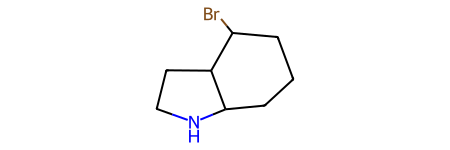

In [227]:
ref_mol

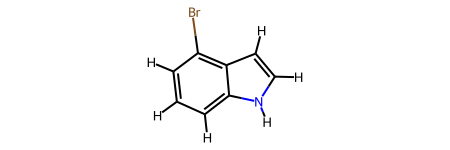

In [228]:
target_mol

In [235]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdmolops

# 1) Load your canonical SMILES or SDF as a template
template_smiles = "C1=CC=CC=C1Br"  # Example for a bromobenzene, adjust for your actual molecule
template_mol = Chem.MolFromSmiles(template_smiles)
template_mol = Chem.AddHs(template_mol)
AllChem.EmbedMolecule(template_mol)

# 2) Load your PDB (with or without Hs) using sanitize=False, removeHs=False
with open("/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb") as fA:
    pdb_block_A = fA.read()

molA = Chem.MolFromPDBBlock(pdb_block_A, removeHs=False, sanitize=False)

# 3) Impose bond orders from the template
molA = AllChem.AssignBondOrdersFromTemplate(template_mol, molA)
Chem.SanitizeMol(molA)  # now it should have correct bond/valence

# 4) Do the same for the second PDB
with open("/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prealigned.pdb") as fB:
    pdb_block_B = fB.read()

molB = Chem.MolFromPDBBlock(pdb_block_B, removeHs=False, sanitize=False)
molB = AllChem.AssignBondOrdersFromTemplate(template_mol, molB)
Chem.SanitizeMol(molB)

# 5) Now RDKit sees them as the same connectivity
match = molB.GetSubstructMatch(molA)
if not match:
    raise ValueError("Still no match – check that template SMILES is correct!")
    
AllChem.AlignMol(molB, molA, atomMap=list(enumerate(match)))
Chem.MolToPDBFile(molB, "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb")


ValueError: No matching found

In [236]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdmolops

def add_hydrogens_to_pdb(
    pdb_filename,
    smiles_string,
    output_pdb="ligand_withHs.pdb",
    do_hydrogen_minimization=True
):
    """
    Reads a PDB with no hydrogens, uses the SMILES template to define the
    bonding and valences, adds hydrogens, preserves the heavy-atom coordinates,
    and optionally minimizes only the hydrogens.
    Writes out a new PDB with the added H atoms.
    """
    # 1) Load template molecule from SMILES (with H’s)
    template = Chem.MolFromSmiles(smiles_string)
    template = Chem.AddHs(template)
    AllChem.EmbedMolecule(template)  # 3D embed so RDKit has a reference

    # 2) Read the PDB (no H’s). Use sanitize=False so we don't break partial bond info.
    mol_noH = Chem.MolFromPDBFile(pdb_filename, removeHs=False, sanitize=False)
    if mol_noH is None:
        raise ValueError(f"Could not parse PDB file {pdb_filename} into an RDKit Mol.")

    # 3) Assign correct bond orders from our SMILES-based template
    #    This enforces the correct ring connectivity, formal charges, etc.
    mol_noH = AllChem.AssignBondOrdersFromTemplate(template, mol_noH)

    # 4) Now explicitly Add H to the PDB molecule
    mol_withH = Chem.AddHs(mol_noH)

    # 5) Overwrite heavy-atom coordinates with the original PDB coords
    #    (ensuring no shift occurs for heavy atoms).
    conf_noH = mol_noH.GetConformer()     # original heavy coords
    conf_withH = mol_withH.GetConformer() # new conformer with H’s
    for atom in mol_withH.GetAtoms():
        if atom.GetSymbol() != 'H':
            idx = atom.GetIdx()
            orig_pos = conf_noH.GetAtomPosition(idx)
            conf_withH.SetAtomPosition(idx, orig_pos)

    # 6) Optionally, do a partial geometry optimization where only H’s can move.
    #    We "freeze" heavy atoms by adding a fixed-point constraint in the force field.
    if do_hydrogen_minimization:
        ff_props = AllChem.MMFFGetMoleculeProperties(mol_withH)
        ff = AllChem.MMFFGetMoleculeForceField(mol_withH, ff_props)
        # Freeze all non-H
        for atom in mol_withH.GetAtoms():
            if atom.GetSymbol() != 'H':
                ff.AddFixedPoint(atom.GetIdx())
        ff.Initialize()
        _ = ff.Minimize()  # only hydrogens move

    # 7) Write out the final PDB
    Chem.MolToPDBFile(mol_withH, output_pdb)
    print(f"Added hydrogens to {pdb_filename} and wrote new PDB to {output_pdb}.")


# ------------------------------
# Example usage:
# Suppose your original no-H PDB is "ligand_noH.pdb",
# and you know the correct SMILES for this molecule is:
#   "Cc1ccccc1Br" (purely as an example; replace with your actual SMILES!)
#
# add_hydrogens_to_pdb("ligand_noH.pdb", "Cc1ccccc1Br", "ligand_withHs.pdb")


In [243]:
add_hydrogens_to_pdb(
    pdb_filename="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb",
    smiles_string="C1=CC2=C(C=CN2)C(=C1)Br",
    output_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_h.pdb",
    do_hydrogen_minimization=True)

ValueError: No matching found

In [232]:
import rdkit
print(rdkit.__version__)


2024.03.5


In [245]:
template = Chem.MolFromSmiles("C1=CC2=C(C=CN2)C(=C1)Br") 
template = Chem.AddHs(template)
AllChem.EmbedMolecule(template)
Chem.SanitizeMol(template)

pdbmol = Chem.MolFromPDBFile("/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb", removeHs=False, sanitize=False)
Chem.SanitizeMol(pdbmol, catchErrors=True)  # might fail if lacking bond info

# Find match
match = pdbmol.GetSubstructMatch(template)
# Then for each bond in the match, set bond order in `pdbmol` to that in `template`.
match

()

In [241]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdchem import BondType

def apply_bond_orders_from_template(template_mol, target_mol):
    """
    Manually set bond orders in 'target_mol' to match those in 'template_mol'.
    Both must represent the same molecule but possibly differ in labeling/order.
    
    Steps:
      1. Find a substructure match from template->target.
      2. For each bond in template, get the corresponding bond in target
         and set the same bond order (single, double, aromatic, etc.).
      3. Mark ring/aromatic flags if needed.
    """
    # 1) Find substructure match.
    #    'match_t' is a tuple of length=template_mol.GetNumAtoms(),
    #    where match_t[i] = (atom index in target_mol) that matches template_mol’s i-th atom.
    match_t = target_mol.GetSubstructMatch(template_mol)
    if not match_t:
        raise ValueError("Could not find substructure match between template and target. "
                         "Check that they represent the same connectivity.")

    # Convert to list so we can index easily
    match_t = list(match_t)

    # 2) For each bond in template, set the same bond order in target
    for bond in template_mol.GetBonds():
        # Indices of the two atoms in the template
        start_t_idx = bond.GetBeginAtomIdx()
        end_t_idx   = bond.GetEndAtomIdx()

        # Map them into the target's atom indices
        start_q_idx = match_t[start_t_idx]
        end_q_idx   = match_t[end_t_idx]

        # Get the corresponding bond in target
        bond_q = target_mol.GetBondBetweenAtoms(start_q_idx, end_q_idx)
        if bond_q is None:
            raise ValueError("No corresponding bond found in target for template bond?")

        # Check if bond is aromatic
        if bond.GetIsAromatic():
            bond_q.SetIsAromatic(True)
            bond_q.SetBondType(BondType.AROMATIC)
        else:
            # Otherwise set numeric bond order
            # e.g. single=1, double=2, triple=3
            template_order = bond.GetBondTypeAsDouble()  # e.g. 1.0, 2.0, 3.0
            # Round to int in case of floating rounding
            int_order = int(round(template_order))
            # Map to RDKit BondType
            if int_order == 1:
                bond_q.SetBondType(BondType.SINGLE)
            elif int_order == 2:
                bond_q.SetBondType(BondType.DOUBLE)
            elif int_order == 3:
                bond_q.SetBondType(BondType.TRIPLE)
            else:
                raise ValueError(f"Unexpected bond order {template_order} in template.")

    # Re‐Sanitize the target with updated bond orders
    # You might need to catch errors or do partial sanitization:
    Chem.SanitizeMol(target_mol)


def add_hydrogens_to_pdb_older_rdkit(
    pdb_filename,
    smiles_string,
    output_pdb="ligand_withHs.pdb",
    do_hydrogen_minimization=True
):
    """
    1) Load a SMILES as the 'template' with correct bonding.
    2) Load the PDB (no H). Do not sanitize fully yet.
    3) Manually set bond orders in the PDB mol to match the template.
    4) Add H's.
    5) Preserve heavy-atom coords, optionally minimize only the H's.
    6) Write final PDB.
    """
    # 1) Load template from SMILES (with Hs so we get the correct valences).
    template_mol = Chem.MolFromSmiles(smiles_string)
    template_mol = Chem.AddHs(template_mol)
    # Force an embedding so RDKit sees 3D positions (though we won't necessarily use them).
    AllChem.EmbedMolecule(template_mol)
    AllChem.UFFOptimizeMolecule(template_mol)

    # 2) Load the PDB with sanitize=False so we don't break partial bond info
    target_mol = Chem.MolFromPDBFile(pdb_filename, removeHs=False, sanitize=False)
    if target_mol is None:
        raise ValueError(f"Could not parse PDB file {pdb_filename} into an RDKit Mol.")

    # 3) Set correct bond orders in 'target_mol' to match the template
    apply_bond_orders_from_template(template_mol, target_mol)

    # 4) Add hydrogens in RDKit
    target_mol_withH = Chem.AddHs(target_mol)

    # 5) We preserve the original heavy-atom coords from the no-H PDB
    conf_noH = target_mol.GetConformer()
    conf_withH = target_mol_withH.GetConformer()

    for atom in target_mol_withH.GetAtoms():
        if atom.GetSymbol() != 'H':
            idx = atom.GetIdx()
            orig_pos = conf_noH.GetAtomPosition(idx)
            conf_withH.SetAtomPosition(idx, orig_pos)

    # 6) Optionally minimize only the H atoms, keep heavy atoms fixed
    if do_hydrogen_minimization:
        ff_props = AllChem.MMFFGetMoleculeProperties(target_mol_withH)
        ff = AllChem.MMFFGetMoleculeForceField(target_mol_withH, ff_props)
        # Freeze all non-H
        for atom in target_mol_withH.GetAtoms():
            if atom.GetSymbol() != 'H':
                ff.AddFixedPoint(atom.GetIdx())
        ff.Initialize()
        _ = ff.Minimize(maxIters=500)

    # 7) Write final PDB
    Chem.MolToPDBFile(target_mol_withH, output_pdb)
    print(f"Added Hs to '{pdb_filename}' using SMILES='{smiles_string}'.")
    print(f"Final result saved to: {output_pdb}")


In [4]:

def apply_bond_orders_from_template(template_mol, target_mol):
    """
    Manually set bond orders in 'target_mol' to match those in 'template_mol'.
    This replicates what newer RDKit does with AssignBondOrdersFromTemplate().
    
    Steps:
      1. Substructure match from template->target.
      2. For each bond in template, set the same bond order (single, double, triple, aromatic) in target.
      3. Re-sanitize 'target_mol' to finalize.
    """
    # 1) Find substructure match
    match_t = target_mol.GetSubstructMatch(template_mol)
    if not match_t:
        raise ValueError(
            "Could not find substructure match between template and target. "
            "Check that they represent the same connectivity."
        )
    match_t = list(match_t)

    # 2) Transfer each bond order
    for bond in template_mol.GetBonds():
        start_t_idx = bond.GetBeginAtomIdx()
        end_t_idx   = bond.GetEndAtomIdx()

        start_q_idx = match_t[start_t_idx]
        end_q_idx   = match_t[end_t_idx]

        bond_q = target_mol.GetBondBetweenAtoms(start_q_idx, end_q_idx)
        if bond_q is None:
            raise ValueError("No corresponding bond found in target for template bond?!")

        # If aromatic:
        if bond.GetIsAromatic():
            bond_q.SetIsAromatic(True)
            bond_q.SetBondType(BondType.AROMATIC)
        else:
            # single/double/triple
            bo = bond.GetBondTypeAsDouble()
            i_bo = int(round(bo))
            if i_bo == 1:
                bond_q.SetBondType(BondType.SINGLE)
            elif i_bo == 2:
                bond_q.SetBondType(BondType.DOUBLE)
            elif i_bo == 3:
                bond_q.SetBondType(BondType.TRIPLE)
            else:
                raise ValueError(f"Unexpected bond order {bo} in template.")

    # 3) Re-sanitize
    Chem.SanitizeMol(target_mol)


def fix_pdb_connectivity_with_smiles(
    pdb_in,
    smiles,
    pdb_out="fixed_connectivity.pdb",
    removeHs=False
):
    """
    1) Load 'pdb_in' as an RDKit Mol (sanitize=False so we can override partial bond info).
    2) Load 'smiles' as a template Mol with correct connectivity.
    3) Assign bond orders from template to PDB Mol.
    4) Write out a new PDB that includes CONECT records.
    
    removeHs=False: if your PDB has no hydrogens, that’s fine. 
                    If you had existing hydrogens you wanted to keep, set removeHs=False as well.
    """
    # 1) Load target from PDB
    mol = Chem.MolFromPDBFile(pdb_in, removeHs=removeHs, sanitize=False)
    if not mol:
        raise ValueError(f"Could not read PDB file {pdb_in} into an RDKit Mol.")

    # 2) Load template from SMILES
    template = Chem.MolFromSmiles(smiles)
    if not template:
        raise ValueError(f"Invalid SMILES: {smiles}")
    template = Chem.AddHs(template)
    AllChem.EmbedMolecule(template)   # 3D embed so RDKit sees a conformer
    AllChem.UFFOptimizeMolecule(template)

    # 3) Apply bond orders from template
    apply_bond_orders_from_template(template, mol)

    # 4) Write out new PDB with connectivity (CONECT). 
    #    By default, MolToPDBFile includes CONECT records unless you set a flavor that omits them.
    Chem.MolToPDBFile(mol, pdb_out)
    print(f"[INFO] Wrote new PDB with CONECT to {pdb_out}")

In [ ]:
fix_pdb_connectivity_with_smiles(
    pdb_in="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb",
    smiles="C1=CC2=C(C=CN2)C(=C1)Br",
    pdb_out="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_fixed.pdb",
    removeHs=False
)

ValueError: Could not find substructure match between template and target. Check that they represent the same connectivity.

In [6]:
def calculate_hydrogen_position(atom, neighbors, bond_length=1.0):
    """
    Calculate the coordinates of a hydrogen atom based on the input atom's geometry.

    Args:
        atom: Biopython Atom object for the input atom.
        neighbors: List of neighboring Biopython Atom objects.
        bond_length (float): Bond length for the hydrogen atom in Ångströms.

    Returns:
        np.ndarray: Hydrogen atom coordinates.
    """

    atom_coord = np.array(atom.coord)

    if len(neighbors) == 1:  # SP hybridization (linear)
        neighbor_coord = np.array(neighbors[0].coord)
        direction = atom_coord - neighbor_coord
        direction /= np.linalg.norm(direction)  # Normalize
        hydrogen_coord = atom_coord + direction * bond_length

    elif len(neighbors) == 2:  # SP2 hybridization (planar)
        neighbor_coords = [np.array(neighbor.coord) for neighbor in neighbors]
        v1 = neighbor_coords[0] - atom_coord
        v2 = neighbor_coords[1] - atom_coord
        v1 /= np.linalg.norm(v1)
        v2 /= np.linalg.norm(v2)
        in_plane_direction = -(v1 + v2)  # Opposite direction within the plane
        in_plane_direction /= np.linalg.norm(in_plane_direction)
        hydrogen_coord = atom_coord + in_plane_direction * bond_length

    elif len(neighbors) == 3:  # SP3 hybridization (tetrahedral)
        # TODO test this case
        neighbor_coords = [np.array(neighbor.coord) for neighbor in neighbors]
        centroid = np.mean(neighbor_coords, axis=0)
        direction = atom_coord - centroid
        direction /= np.linalg.norm(direction)  # Normalize
        hydrogen_coord = atom_coord + direction * bond_length

    else:
        raise ValueError(
            f"Unsupported geometry for atom with {len(neighbors)} neighbors."
        )

    print(
        f"Calculated hydrogen position from {atom} based on {neighbors}: {hydrogen_coord}"
    )

    return hydrogen_coord

In [9]:
import numpy as np
from Bio import PDB
from Bio.PDB import PDBParser, PDBIO
from Bio.PDB.Atom import Atom

def add_hydrogen_to_n1(
    input_pdb="input.pdb",
    output_pdb="output_withH.pdb",
    chain_id="B",
    residue_name="LIG",
    atom_name="N1",
    bond_length=1.0,
    neighbor_cutoff=1.9
):
    """
    Reads a PDB file, finds the target atom (N1 of LIG in chain B), 
    determines its bonded neighbors (distance < neighbor_cutoff), 
    calculates a hydrogen position, and writes a new PDB with that H added.
    """

    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("structure", input_pdb)
    model = structure[0]  # Take the first model

    # -- Locate the target residue --
    try:
        chain = model[chain_id]
    except KeyError:
        raise ValueError(f"Chain {chain_id} not found in the structure.")

    target_res = None
    for res in chain:
        if res.resname.strip() == residue_name:
            target_res = res
            break
    if target_res is None:
        raise ValueError(f"Residue {residue_name} not found in chain {chain_id}.")

    # -- Locate the target atom (e.g. "N1") --
    target_atom = None
    for atom in target_res:
        if atom.get_name().strip() == atom_name:
            target_atom = atom
            break
    if target_atom is None:
        raise ValueError(f"Atom {atom_name} not found in residue {residue_name}.")

    # -- Find neighbors within a small distance (e.g. < 1.9 Å) to define bonding --
    neighbors = []
    for atom in target_res.get_atoms():
        if atom is target_atom:
            continue
        dist = (target_atom - atom)  # Biopython overloads '-' to measure distance
        if dist < neighbor_cutoff:
            neighbors.append(atom)

    # -- Calculate the hydrogen coordinate --
    new_H_coord = calculate_hydrogen_position(target_atom, neighbors, bond_length=bond_length)

    # -- Create a new Atom object --
    # We name it e.g. "Hn1" or "H1 ". Must be 4 chars wide in PDB land, so " H1 " or something.
    new_atom_name = "H1 "
    new_atom = Atom(
        new_atom_name.strip(),
        new_H_coord,
        bfactor=0.0,
        occupancy=1.0,
        altloc=" ",
        fullname=new_atom_name,
        serial_number=9999,
        element="H"
    )

    # -- Add the new Atom to the residue --
    target_res.add(new_atom)

    # -- Write out the updated structure --
    io = PDBIO()
    io.set_structure(structure)
    io.save(output_pdb)
    print(f"Added hydrogen '{new_atom_name.strip()}' to {atom_name} in residue {residue_name}.")
    print(f"New PDB saved as: {output_pdb}")


In [10]:
add_hydrogen_to_n1(
    input_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb",
    output_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_h.pdb")

Calculated hydrogen position from <Atom N1> based on [<Atom C3>, <Atom C6>]: [-1.7952912  3.499333   7.955412 ]
Added hydrogen 'H1' to N1 in residue LIG.
New PDB saved as: /disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_h.pdb


In [16]:
def calculate_hydrogen_position(atom, neighbors, bond_length=1.0):
    """
    Calculate the coordinates of a hydrogen atom based on the input atom's geometry.
    - If the central atom is carbon or nitrogen, the logic remains:
        * 1 neighbor => sp
        * 2 neighbors => sp2
        * 3 neighbors => sp3
    - If the central atom is oxygen with only 1 neighbor, treat it as sp3-like
      and place a single hydrogen in the direction opposite that neighbor.
    - For a true 'carbene' (C with exactly 2 neighbors), sp2 logic applies.
    """
    from Bio.PDB.Atom import Atom

    # Retrieve element symbol (works if you're using Biopython Atom objects)
    # If your 'atom' is not a Biopython Atom, adapt accordingly.
    element = atom.element.strip().upper()
    atom_coord = np.array(atom.coord)

    # Special case: Oxygen with 1 neighbor => treat as if it had sp3 geometry (one missing bond)
    if element == "O" and len(neighbors) == 1:
        # We'll place exactly one hydrogen. 
        # The direction is simply away from the neighbor (like the sp3 approach with a single neighbor).
        neighbor_coord = np.array(neighbors[0].coord)
        direction = atom_coord - neighbor_coord
        direction /= np.linalg.norm(direction)  # normalize
        hydrogen_coord = atom_coord + direction * bond_length

        print(
            f"[O-override] Calculated H for O({atom.get_name()}) with 1 neighbor ({neighbors[0].get_name()}): "
            f"{hydrogen_coord}"
        )
        return hydrogen_coord

    # Otherwise, fallback to the original sp / sp2 / sp3 rules:
    if len(neighbors) == 1:  
        # SP (linear)
        neighbor_coord = np.array(neighbors[0].coord)
        direction = atom_coord - neighbor_coord
        direction /= np.linalg.norm(direction)  # Normalize
        hydrogen_coord = atom_coord + direction * bond_length

    elif len(neighbors) == 2:
        # SP2 (planar)
        neighbor_coords = [np.array(n.coord) for n in neighbors]
        v1 = neighbor_coords[0] - atom_coord
        v2 = neighbor_coords[1] - atom_coord
        v1 /= np.linalg.norm(v1)
        v2 /= np.linalg.norm(v2)
        in_plane_direction = -(v1 + v2)  # Opposite direction within the plane
        in_plane_direction /= np.linalg.norm(in_plane_direction)
        hydrogen_coord = atom_coord + in_plane_direction * bond_length

    elif len(neighbors) == 3:
        # SP3 (tetrahedral)
        neighbor_coords = [np.array(n.coord) for n in neighbors]
        centroid = np.mean(neighbor_coords, axis=0)
        direction = atom_coord - centroid
        direction /= np.linalg.norm(direction)  # Normalize
        hydrogen_coord = atom_coord + direction * bond_length

    else:
        raise ValueError(
            f"Unsupported geometry for atom {atom.get_name()} with {len(neighbors)} neighbors."
        )

    print(
        f"Calculated hydrogen position for {atom.get_name()} with {len(neighbors)} neighbors: {hydrogen_coord}"
    )
    return hydrogen_coord

def add_hydrogens_to_atoms(
    input_pdb: str,
    output_pdb: str,
    target_list,
    bond_length: float = 1.0,
    neighbor_cutoff: float = 1.9
):
    """
    For each (chain_id, residue_name, atom_name) in 'target_list':
      1) Finds that atom in the PDB
      2) Locates neighbors (distance < neighbor_cutoff)
      3) Computes a hydrogen position
      4) Creates a new H atom with a unique name
      5) Adds it to the residue
    Finally writes a single updated PDB with all new hydrogens.

    Example for target_list:
      [("B", "LIG", "N2"), ("B", "LIG", "O1")]
    """
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("my_structure", input_pdb)
    model = structure[0]  # handle the first model

    # Counter for newly added H atoms
    new_h_serial = 1

    for (chain_id, residue_name, atom_name) in target_list:
        # 1) Locate chain
        if chain_id not in model:
            raise ValueError(f"Chain '{chain_id}' not found in PDB.")

        chain = model[chain_id]

        # 2) Locate residue by name
        target_res = None
        for res in chain:
            if res.resname.strip() == residue_name:
                target_res = res
                break
        if target_res is None:
            raise ValueError(f"Residue '{residue_name}' not found in chain '{chain_id}'.")

        # 3) Locate the atom (e.g. 'N2', 'O1')
        target_atom = None
        for atom in target_res:
            if atom.get_name().strip() == atom_name:
                target_atom = atom
                break
        if target_atom is None:
            raise ValueError(
                f"Atom '{atom_name}' not found in residue '{residue_name}' "
                f"(chain '{chain_id}')"
            )

        # 4) Find neighbors within distance < neighbor_cutoff
        neighbors = []
        for atom in target_res.get_atoms():
            if atom is target_atom:
                continue
            dist = target_atom - atom
            if dist < neighbor_cutoff:
                neighbors.append(atom)

        # 5) Compute new H coordinate
        new_H_coord = calculate_hydrogen_position(
            target_atom, neighbors, bond_length=bond_length
        )

        # 6) Create a unique 4-char name, e.g. 'H9000'
        #    We'll do 'H' plus the serial. If it's too long, you can slice.
        #    PDB atom name is columns 13-16. We'll left-justify to 4 chars:
        new_atom_name_str = f"H{new_h_serial}"
        # If we want to cap at 4 chars total:
        new_atom_name_str = new_atom_name_str[:4]  # e.g. 'H900' if we exceed 4
        # Then left-justify to ensure it's 4 chars wide in PDB:
        new_atom_name_str = new_atom_name_str.ljust(4)

        new_atom = Atom(
            new_atom_name_str.strip(),  # strip for Biopython's internal ID
            new_H_coord,
            bfactor=0.0,
            occupancy=1.0,
            altloc=" ",
            fullname=new_atom_name_str,  # 4-char for PDB output
            serial_number=new_h_serial,
            element="H",
        )
        new_h_serial += 1

        # 7) Add to the residue
        target_res.add(new_atom)
        print(
            f"Added new hydrogen '{new_atom_name_str.strip()}' to '{atom_name}' "
            f"in residue '{residue_name}' (chain '{chain_id}') coords={new_H_coord}"
        )

    # After processing all targets, write out the updated structure
    io = PDBIO()
    io.set_structure(structure)
    io.save(output_pdb)
    print(f"\nSaved updated PDB with new hydrogens to: {output_pdb}")

In [17]:
add_hydrogens_to_atoms(
        input_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/PLP-dependent_aminoacrylate/PLP-dependent_aminoacrylate_prehydrogen.pdb",
        output_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/PLP-dependent_aminoacrylate/PLP-dependent_aminoacrylate_h.pdb",
        target_list=[("B", "LIG", "N2"), ("B", "LIG", "O1")],
        bond_length=1.0,
        neighbor_cutoff=1.9
    )

Calculated hydrogen position for N2 with 2 neighbors: [3.2719305 2.2664237 5.1593237]
Added new hydrogen 'H1' to 'N2' in residue 'LIG' (chain 'B') coords=[3.2719305 2.2664237 5.1593237]
Calculated hydrogen position for O1 with 2 neighbors: [5.5101466 2.4473586 4.0861425]
Added new hydrogen 'H2' to 'O1' in residue 'LIG' (chain 'B') coords=[5.5101466 2.4473586 4.0861425]

Saved updated PDB with new hydrogens to: /disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/PLP-dependent_aminoacrylate/PLP-dependent_aminoacrylate_h.pdb


In [18]:
add_hydrogens_to_atoms(
        input_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb",
        output_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_h.pdb",
        target_list=[("B", "LIG", "N1")],
        bond_length=1.0,
        neighbor_cutoff=1.9
    )

Calculated hydrogen position for N1 with 2 neighbors: [-1.7952912  3.499333   7.955412 ]
Added new hydrogen 'H1' to 'N1' in residue 'LIG' (chain 'B') coords=[-1.7952912  3.499333   7.955412 ]

Saved updated PDB with new hydrogens to: /disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_h.pdb
